<a href="https://colab.research.google.com/github/MarialuizaLeao/NotebooksIC/blob/master/Aula03Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.optim as optim

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

plt.rcParams['axes.axisbelow'] = True 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.ymargin'] = 0.1

plt.rcParams['font.family'] = 'serif'

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out' 
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = .5
plt.rcParams['xtick.minor.visible'] = True

plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = .5
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 10

In [ ]:
plt.style.use('tableau-colorblind10') # use um estilo colorblind!
plt.ion()

In [ ]:
X, y = make_blobs(n_features=2, n_samples=1000, random_state=42)

In [ ]:
X = X[y != 2]
y = y[y != 2]

In [ ]:
X

array([[ 5.19820575,  2.04917508],
       [-2.96855852,  8.16444176],
       [-2.76878897,  7.51114318],
       ...,
       [-1.88507781,  9.64263164],
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838]])

In [ ]:
y

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

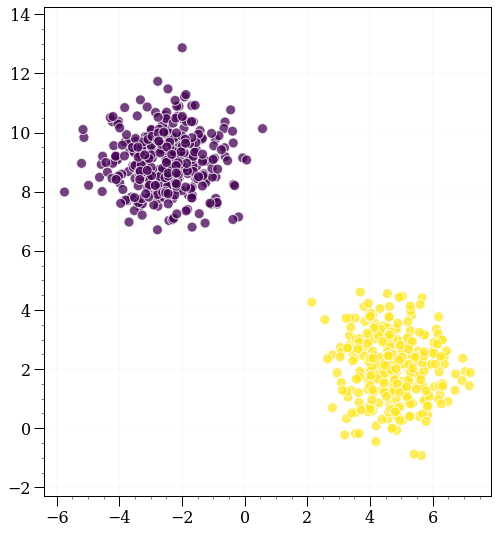

In [ ]:
_, ax = plt.subplots(figsize=(8, 9))
ax.scatter(X[:,0], X[:,1], c=y, edgecolor='w', alpha=0.75)

In [ ]:
def add_intercept(X: np.ndarray) -> np.ndarray:
    N = np.zeros(shape=(X.shape[0], X.shape[1] + 1))
    N[:, 0] = 1
    N[:, 1:] = X
    return N

In [ ]:
def perceptron(X: np.ndarray, y: np.ndarray, lr: float) -> np.ndarray:
    X = add_intercept(X.copy())
    w = np.zeros(X.shape[1])

    change = True
    while change:
        change = False
        for i in range(X.shape[0]):
            xi = X[i]
            yi = y[i]

            s = (w * xi).sum()
            if s > 0:
                ŷi = 1
            else:
                ŷi = 0
            
            if ŷi != yi:
                w = w + lr * (yi - ŷi) * xi
                change = True
    return w

In [ ]:
w = perceptron(X, y, 0.5)
# x2 = -w1.x1/w2 - w0/w2
x1 = np.linspace(-6, 6, 100)
x2 = -((w[1] * x1) / w[2]) - (w[0]/w[2])

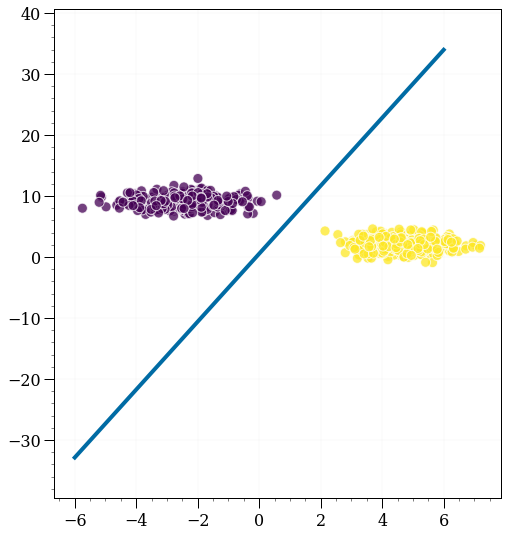

In [ ]:
_, ax = plt.subplots(figsize=(8, 9))
ax.scatter(X[:,0], X[:,1], c=y, edgecolor='w', alpha=0.75)
ax.plot(x1, x2)